In [1]:
import cv2

In [2]:
pip install deepface

     ---------------------------------------- 49.6/49.6 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 88.3/88.3 kB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     -------------------------------------- 101.8/101.8 kB 5.7 MB/s eta 0:00:00
     ---------------------------------------- 2.3/2.3 MB 11.1 MB/s eta 0:00:00
     ---------------------------------------- 79.5/79.5 kB 4.3 MB/s eta 0:00:00
     ---------------------------------------- 96.6/96.6 kB 5.4 MB/s eta 0:00:00

  Created wheel for fire: filename=fire-0.5.0-py2.py3-none-any.whl size=116951 sha256=d9e0219df31b23b8b855abeea875010dd44328fc589faaefe2011a3ca7b08fdb
  Stored in directory: c:\users\vedan\appdata\local\pip\cache\wheels\90\d4\f7\9404e5db0116bd4d43e5666eaa3e70ab53723e1e3ea40c9a95
Successfully built fire


In [3]:
from deepface import DeepFace

Directory  C:\Users\vedan /.deepface created
Directory  C:\Users\vedan /.deepface/weights created


In [5]:
img = cv2.imread('OIP.jpg')
prediction = DeepFace.analyze(img)

facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: C:\Users\vedan\.deepface\weights\facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:01<00:00, 5.97MB/s]


age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: C:\Users\vedan\.deepface\weights\age_model_weights.h5
100%|██████████| 539M/539M [01:30<00:00, 5.94MB/s] 


gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: C:\Users\vedan\.deepface\weights\gender_model_weights.h5
100%|██████████| 537M/537M [01:05<00:00, 8.24MB/s] 


race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: C:\Users\vedan\.deepface\weights\race_model_single_batch.h5
100%|██████████| 537M/537M [01:31<00:00, 5.87MB/s] 
Action: race: 100%|██████████| 4/4 [00:05<00:00,  1.46s/it]   


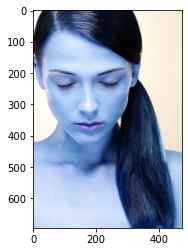

In [6]:
import matplotlib.pyplot as plt

plt.imshow(img)

In [7]:
prediction

[{'emotion': {'angry': 0.0824280665256083,
   'disgust': 0.0005573038833972532,
   'fear': 66.45961403846741,
   'happy': 0.061930157244205475,
   'sad': 7.0320069789886475,
   'surprise': 0.010989988368237391,
   'neutral': 26.352474093437195},
  'dominant_emotion': 'fear',
  'region': {'x': 21, 'y': 117, 'w': 314, 'h': 314},
  'age': 27,
  'gender': {'Woman': 89.06065821647644, 'Man': 10.939348489046097},
  'dominant_gender': 'Woman',
  'race': {'asian': 0.001020236322801793,
   'indian': 0.002100834717566613,
   'black': 1.94397927089085e-05,
   'white': 96.4382529258728,
   'middle eastern': 1.8903935328125954,
   'latino hispanic': 1.668219454586506},
  'dominant_race': 'white'}]

In [8]:
prediction[0]['dominant_emotion']

'fear'

In [9]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [10]:
cv2.CascadeClassifier

cv2.CascadeClassifier

In [11]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = faceCascade.detectMultiScale(gray,1.1,4)

for (x,y,w,h) in faces:
  cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)

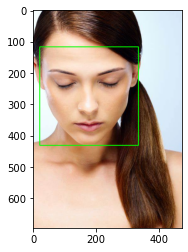

In [12]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [13]:
font = cv2.FONT_HERSHEY_SIMPLEX

cv2.putText(img,
            prediction[0]['dominant_emotion'],
            (0,100),
            font,1,
            (0,0,255),
            2,
            cv2.LINE_4);
  

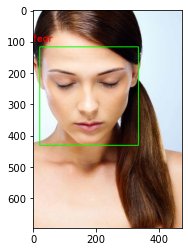

In [14]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [19]:
cap = cv2.VideoCapture(1)

if not cap.isOpened():
  cap = cv2.VideoCapture(0)
if not cap.isOpened():
  raise IOError('Cannot Open Webcam')

while True:
  ret, frame = cap.read() # Reads frame from video
  result = DeepFace.analyze(frame)
  result = result[0]['dominant_emotion']

  gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
  faces = faceCascade.detectMultiScale(gray,1.1,4)

  for (x,y,w,h) in faces:
    cv2.rectangle(frame,(x,y),(x+w,y+h),(0,255,0),2)

    font = cv2.FONT_HERSHEY_SIMPLEX

    cv2.putText(frame,
                result,
                (50,50),
                font,3,
                (0,0,255),
                2,
                cv2.LINE_4)
    cv2.imshow('Original Video',frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
      break

cap.release()
cv2.destroyAllWindows

Action: gender:  50%|█████     | 2/4 [00:02<00:02,  1.41s/it] 


KeyboardInterrupt: 

: 